## Introduction to come

Working on this project to show some insights regarding Sales and CRM dates.

__________

In [266]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.colors import to_rgba
import seaborn as sns


import io
import itertools
from decimal import Decimal 
import math

from scipy.stats import anderson
from scipy.stats import shapiro
from scipy.stats import zscore
from scipy.stats import mannwhitneyu
from scipy.stats import linregress

import warnings
warnings.filterwarnings("ignore")


In [169]:
# show the full brights of the rows (and reset if not needed anymore)

pd.set_option("display.max_colwidth", None)

# pd.reset_option("display.max_colwidth")


### loading data

In [170]:
df_superstore = pd.read_csv('./superstore_dataset.csv',  encoding='latin-1')

df_superstore.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


In [171]:
df_superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product_ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub_Category   9800 non-null   object 
 16  Product_Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [172]:
# check for NaN

df_superstore.isna().sum()

Row_ID            0
Order_ID          0
Order_Date        0
Ship_Date         0
Ship_Mode         0
Customer_ID       0
Customer_Name     0
Segment           0
Country           0
City              0
State             0
Postal_Code      11
Region            0
Product_ID        0
Category          0
Sub_Category      0
Product_Name      0
Sales             0
dtype: int64

Is it 11 clients or 11 orders without PostalCode?

In [173]:
# check the unique Customer IDs where Postal Code is NaN

df_nan = df_superstore[df_superstore['Postal_Code'].isna()]
df_nan['Customer_ID'].unique()

array(['QJ-19255', 'SV-20785', 'VM-21685', 'CB-12535', 'RM-19375'],
      dtype=object)

Are there other orrders with these IDs where the postal Code is entered?

In [174]:
# check the list of Customer ID if there are different Postal Codes

nan_customer = ['QJ-19255', 'SV-20785', 'VM-21685', 'CB-12535', 'RM-19375']

df_nan = df_superstore[df_superstore['Customer_ID'].isin(nan_customer)]

df_postal_codes = df_nan.groupby('Customer_ID')['Postal_Code'].apply(list)

df_postal_codes

Customer_ID
CB-12535                                                                    [27514.0, 44221.0, 94110.0, 2038.0, 2038.0, 19711.0, 19711.0, 19711.0, 38671.0, 38671.0, 38671.0, 38671.0, 93010.0, 93010.0, 93010.0, 93010.0, nan, nan, nan]
QJ-19255                                                                                                                    [55106.0, 19143.0, 19143.0, nan, 10009.0, 22153.0, 22153.0, 22153.0, 60653.0, 19134.0, 48234.0, 48234.0, nan]
RM-19375                                                                                                                                                                 [77095.0, 95123.0, 6450.0, 31907.0, 27604.0, nan, nan, nan, nan]
SV-20785    [81001.0, 81001.0, 30076.0, 30076.0, 30076.0, 19140.0, 19140.0, 19140.0, 19140.0, 19140.0, 19140.0, 19140.0, nan, 21215.0, 21215.0, 32216.0, 32216.0, 92704.0, 92704.0, 92704.0, 92704.0, 92704.0, 90045.0, 90045.0, 47401.0]
VM-21685                                            

There are different Postal Codes per Customer ID - so I drop the NaN

In [175]:
# drop Nan

df_superstore.dropna(inplace=True)

## change datatypes

Order_Date - datetime  
Ship_Date - datetime  
Postal_Code - integer  
Sales - float 

In [176]:
# lower case for all columns names of df_superstore

df_superstore.columns = df_superstore.columns.str.lower()

In [211]:
## setting datatypes

# dates
df_superstore['order_date'] = pd.to_datetime(df_superstore['order_date'], format='%d/%m/%Y')
df_superstore['ship_date'] = pd.to_datetime(df_superstore['ship_date'], format='%d/%m/%Y')

# postcode as integer
df_superstore['postal_code'] = df_superstore['postal_code'].astype('int')

# sales with 2 decimals
df_superstore['sales'] = df_superstore['sales'].astype(float)
df_superstore['sales'] = df_superstore['sales'].round(2)


In [213]:
df_superstore.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9789 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   row_id         9789 non-null   int64         
 1   order_id       9789 non-null   object        
 2   order_date     9789 non-null   datetime64[ns]
 3   ship_date      9789 non-null   datetime64[ns]
 4   ship_mode      9789 non-null   object        
 5   customer_id    9789 non-null   object        
 6   customer_name  9789 non-null   object        
 7   segment        9789 non-null   object        
 8   country        9789 non-null   object        
 9   city           9789 non-null   object        
 10  state          9789 non-null   object        
 11  postal_code    9789 non-null   int64         
 12  region         9789 non-null   object        
 13  product_id     9789 non-null   object        
 14  category       9789 non-null   object        
 15  sub_category   9789 non-nu

## EDA

### period of time

In [214]:
# from when to when do we have dates in this dataset?

print(f"The observerd time period is from {df_superstore['order_date'].min().strftime('%Y-%m-%d')}" 
      f" until {df_superstore['order_date'].max().strftime('%Y-%m-%d')}.")

The observerd time period is from 2015-01-03 until 2018-12-30.


### number of customers

In [215]:
# how many unique customers

print(f"The number of distinct customers is {df_superstore['customer_id'].nunique()}.")

The number of distinct customers is 793.


### number of orders

In [216]:
# how many order

print(f"The number of orders is {df_superstore['order_id'].nunique()}.")

The number of orders is 4916.


### number of products

In [217]:
# how many products

print(f"There are {df_superstore['product_id'].nunique():,} different products.")

There are 1,860 different products.


### categories: clients & products

In [218]:
# what customer categories
print(f"The customers are divided into {df_superstore['segment'].nunique()} segemnts: {df_superstore['segment'].unique()}.")

# what product categories
print(f"The number of different product categories is {df_superstore['category'].nunique()}" 
      f": {df_superstore['category'].unique()}.")

# highest, lowest and average price
print(f"The price range is from {df_superstore['sales'].min():,}$ to {df_superstore['sales'].max():,}$" 
      f" with an average of {df_superstore['sales'].mean():,.2f}$.")


The customers are divided into 3 segemnts: ['Consumer' 'Corporate' 'Home Office'].
The number of different product categories is 3: ['Furniture' 'Office Supplies' 'Technology'].
The price range is from 0.44$ to 22,638.48$ with an average of 230.12$.


### conclusions from orders: prices, amounts, discounts

In [219]:
## how many different products per order and average price

# group by order and count unique product IDs
df_products_pO = df_superstore.groupby('order_id')['product_id'].nunique().reset_index()
df_products_pO.columns = ['order_id', 'unique_products']

# group by Order_ID and summed Sales
df_order_sales = df_superstore.groupby('order_id')['sales'].sum().reset_index()
df_order_sales.columns = ['order_id', 'sum_sales']

# call the numbers
print(f"On average there are {df_products_pO['unique_products'].mean():.1f} different products per order" 
      f" and a value of {df_order_sales['sum_sales'].mean():,.2f}$.")

On average there are 2.0 different products per order and a value of 458.22$.


Can we get prices for products - are they different due to discount or also due to amount per order (4 chairs f.e.)

In [220]:
# are there different prices for the same Product_ID?

df_prices = df_superstore.groupby('product_id')['sales'].apply(list).reset_index(name="prices")
df_prices["prices"] = df_prices["prices"].apply(lambda lst: [float(p) for p in lst])


df_prices.head(25)

,product_id,prices
0,FUR-BO-10000112,[825.17]
1,FUR-BO-10000330,"[411.33, 411.33, 241.96]"
2,FUR-BO-10000362,"[359.06, 290.67, 136.78, 1025.88, 341.96]"
3,FUR-BO-10000468,"[145.74, 194.32, 102.02, 48.58, 77.73, 155.46]"
4,FUR-BO-10000711,"[638.82, 212.94]"
5,FUR-BO-10000780,"[956.66, 956.66, 321.57, 301.47, 410.0]"
6,FUR-BO-10001337,"[514.16, 102.83, 308.5, 241.96, 617.0, 362.94, 205.67, 290.35, 205.67, 120.98]"
7,FUR-BO-10001519,"[186.05, 174.42, 87.21, 148.26, 523.26]"
8,FUR-BO-10001567,[90.88]
9,FUR-BO-10001601,"[222.67, 623.46, 89.07]"


As there are >1.800 different products, I can't manualy check for each.

There can be two contraire dynamics in the Sales
- multiples: than the lowest price would be the price for one product of that ID
- discounts: than the lowest price would be with the a discount

How can I combine these two concepts?  
I start with asuming the first case, that all sales are multiples of the smallest price (min_price = price for one item)  
For checking if there may also be the discount dynamic, I check for valid_multiples. Any difference bigger then 0.019 is assumed as a discount - so I start with 2% discount as a valid discount.  
If more then 50% of the prices per Product_ID don't fit to the min_price, we need to find a different unitprice by searching for the GCD (greatest common divisor) by multiplying with 100 and the numpy function .gcd.  
Following that we can find discounts and then cluster the prices in the three categories 
 - "unit_price_estimate
 - "multiples"
 - "discounts"


-----
I tried different versions but didn't get a reliable result. so I stop for the prices for now and pass over to the customer related insights

In [221]:
# analysing the prices


def gcd(a, b):
    # Compute the greatest common divisor using Euclid's algorithm
    while b:
        a, b = b, a % b
    return a

def analyze_product_prices(prices):
    prices = sorted(prices)  # Sort prices for easier analysis
    min_price = min(prices)  # Lowest price as starting point (unit price candidate)
    
    # Step 1: Calculate initial multiples
    multiples = [price / min_price for price in prices]
    
    # Step 2: Check if the multiples are valid (whole number multiples with a tolerance of 10%)
    valid_multiples = []
    for multiple in multiples:
        rounded_multiple = round(multiple)
        # Check if the difference between the rounded multiple and the actual multiple is within 10% tolerance
        if abs(multiple - rounded_multiple) <= 0.1 * rounded_multiple:
            valid_multiples.append(rounded_multiple)
        else:
            valid_multiples.append(None)  # Mark invalid multiples
    
    # Step 3: If all multiples are invalid, use the GCD approach to find a new valid unit price
    if None in valid_multiples:
        # Convert price differences to integers (by multiplying by 100 to handle two decimal places)
        price_differences = [abs(prices[i] - prices[i-1]) for i in range(1, len(prices))]  # Using integer values
        gcd_value = price_differences[0]
        for diff in price_differences[1:]:
            gcd_value = gcd(gcd_value, diff)
        
        # The GCD might give us a new candidate for the unit price
        new_unit_price = gcd_value  # Now we don't scale it down, as we're working with integers
        
        multiples = [price / new_unit_price for price in prices]
        
        # If the GCD approach didn't yield valid multiples, return the best effort
        if any(abs(multiple - round(multiple)) > 0.1 * round(multiple) for multiple in multiples):
            new_unit_price = min_price  # Fallback to the original minimal price

    else:
        new_unit_price = min_price  # If valid multiples were found, keep the original minimum price

    # Step 4: Return results with the calculated unit price and multiples
    return {
        "unit_price_estimate": new_unit_price,
        "multiples": valid_multiples,
        "discounts": [(price - new_unit_price * valid_multiple) / (new_unit_price * valid_multiple) 
                      for price, valid_multiple in zip(prices, valid_multiples) if valid_multiple is not None]
    }

# Example usage on a dataframe column 'Prices'
df_price_analysis = df_prices['prices'].apply(analyze_product_prices)

# Expand the result into columns if needed
df_price_analysis_expanded = pd.json_normalize(df_price_analysis)

# Merging it back with the original dataframe if necessary
df_prices_with_analysis = pd.concat([df_prices, df_price_analysis_expanded], axis=1)

df_prices_with_analysis.head()




,product_id,prices,unit_price_estimate,multiples,discounts
0,FUR-BO-10000112,[825.17],8.251700e+02,[1],[0.0]
1,FUR-BO-10000330,"[411.33, 411.33, 241.96]",2.419600e+02,"[1, None, None]",[0.0]
2,FUR-BO-10000362,"[359.06, 290.67, 136.78, 1025.88, 341.96]",2.842171e-14,"[1, 2, None, None, 8]","[4812518414310440.0, 5113520717530398.0, 4511867954811371.0]"
3,FUR-BO-10000468,"[145.74, 194.32, 102.02, 48.58, 77.73, 155.46]",1.421085e-14,"[1, None, 2, 3, 3, 4]","[3418513592150916.0, 3589509640502639.5, 3418513592150916.0, 3646508323286548.0, 3418513592150916.0]"
4,FUR-BO-10000711,"[638.82, 212.94]",2.129400e+02,"[1, 3]","[0.0, 1.7796380470494982e-16]"


I stop here because I'm not happy with the potential prices. But as I want to focus on CRM, I leave that for now

----

## SALES

For getting an overview about where sales come from - regional, segment and category - I will do some visualisations.

- cluster by segments
- cluster by category and/or subcategory
- compare regions profils (segments, categories)

I don't have dates for profitability

In [227]:
df_sales = df_superstore[[
                'order_id',
                'order_date',
                'ship_date',
                'region',
                'city',
                'segment',
                'category',
                'sub_category',
                'sales'
]]

df_sales.describe(include='all')

,order_id,order_date,ship_date,region,city,segment,category,sub_category,sales
count,9789,9789,9789,9789,9789,9789,9789,9789,9789.000000
unique,4916,NaN,NaN,4,529,3,3,17,NaN
top,CA-2018-100111,NaN,NaN,West,New York City,Consumer,Office Supplies,Binders,NaN
freq,14,NaN,NaN,3140,891,5096,5903,1492,NaN
mean,NaN,2017-05-01 02:51:57.866993664,2017-05-05 01:56:03.898253056,NaN,NaN,NaN,NaN,NaN,230.116168
min,NaN,2015-01-03 00:00:00,2015-01-07 00:00:00,NaN,NaN,NaN,NaN,NaN,0.440000
25%,NaN,2016-05-23 00:00:00,2016-05-27 00:00:00,NaN,NaN,NaN,NaN,NaN,17.250000
50%,NaN,2017-06-26 00:00:00,2017-06-29 00:00:00,NaN,NaN,NaN,NaN,NaN,54.380000
75%,NaN,2018-05-15 00:00:00,2018-05-19 00:00:00,NaN,NaN,NaN,NaN,NaN,210.390000
max,NaN,2018-12-30 00:00:00,2019-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,22638.480000


### visualisation

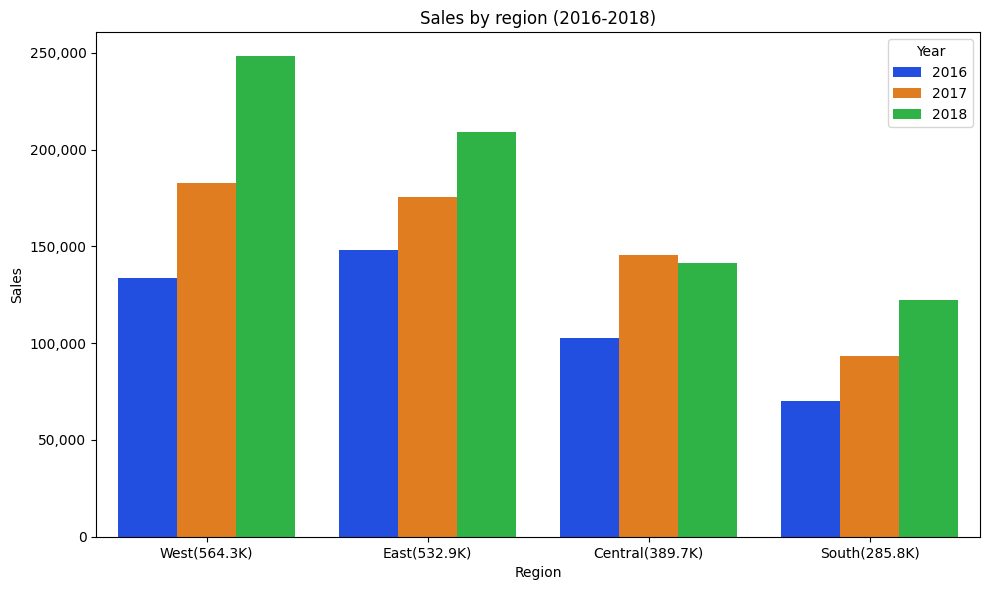

In [271]:
## best region over the three years 2016-2018 / each region in one colour devided by years as intesity of colour

df_sales['year'] = df_sales['order_date'].dt.year

# time period
filtered_df = df_sales[df_sales['year'].isin([2016, 2017, 2018])]

# sales by region
region_sales = filtered_df.groupby(['region', 'year'])['sales'].sum().reset_index()

# overall sale by region
region_totals = (region_sales.groupby('region')['sales'].sum().sort_values(ascending=False))

# labels including total sales
region_labels = {
    region: f"{region}({sales / 1_000:,.1f}K)"
    for region, sales in region_totals.items()
}

# ordering by over all sales and replace region with region_label
region_sales['region_label'] = region_sales['region'].map(region_labels)
region_order = [region_labels[r] for r in region_totals.index]

# plot
plt.figure(figsize=(10,6))
ax = sns.barplot(data=region_sales, x='region_label', y='sales', hue='year', order=region_order, palette='bright')


# include 1,000 seperator for ylabel with FuncFormatter
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.title('Sales by region (2016-2018)')
plt.ylabel('Sales')
plt.xlabel('Region')
plt.legend(title='Year')
plt.tight_layout()
plt.show();

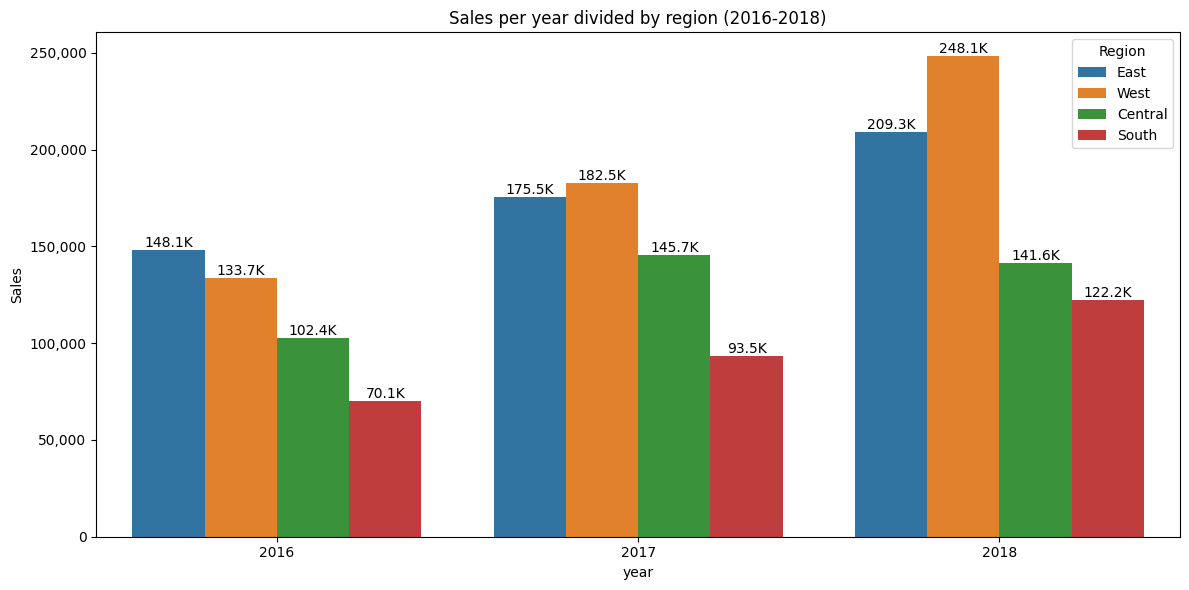

In [260]:
## best region over the three years 2016-2018

df_sales['year'] = df_sales['order_date'].dt.year

# time period
filtered_df = df_sales[df_sales['year'].isin([2016, 2017, 2018])]

# sales by region
region_sales = filtered_df.groupby(['region', 'year'])['sales'].sum().reset_index()

# overall sale by region
region_totals = (region_sales.groupby('region')['sales'].sum().sort_values(ascending=False))

# ordering by regional sales
region_sales = region_sales.sort_values(by=['year', 'sales'], ascending=[True, False])

# plot
plt.figure(figsize=(12,6))
ax = sns.barplot(data=region_sales, x='year', y='sales', hue='region', order=[2016,2017, 2018])

# include 1,000 seperator for ylabel with FuncFormatter
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# build text per patch incl calculate x_position as horizontal middle for the text
for p in ax.patches:
    height = p.get_height()
    x_position = p.get_x() + p.get_width() / 2
    ax.text(x_position, height + 0.02, f'{height / 1_000:,.1f}K',
    ha='center', va='bottom', fontsize=10, color='black')

plt.title('Sales per year divided by region (2016-2018)')
plt.ylabel('Sales')
plt.legend(title='Region')
plt.tight_layout()
plt.show();

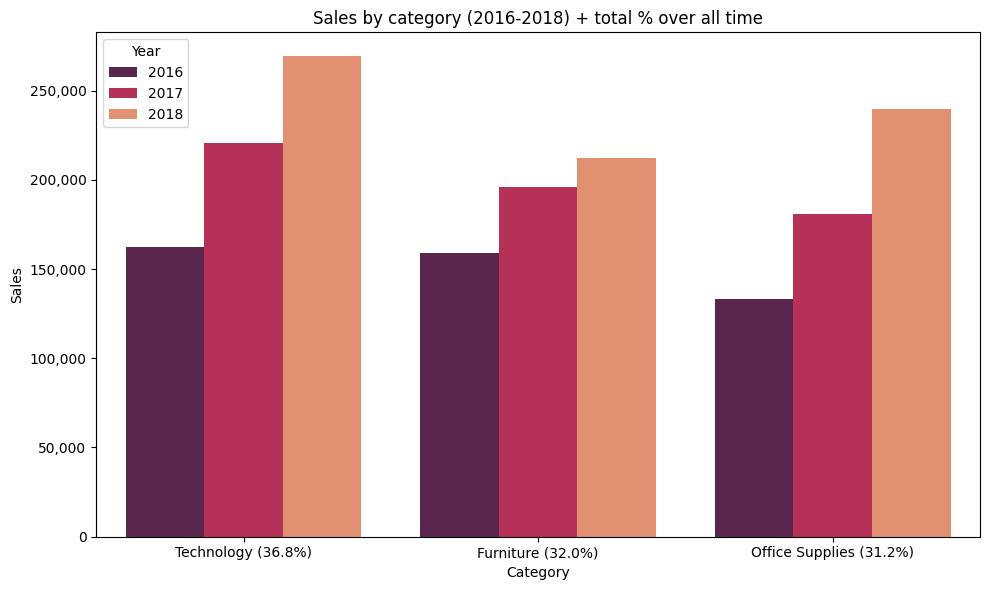

In [265]:
## bests categories over the period 2016-2018

# sales by category 
category_sales = filtered_df.groupby(['category', 'year'])['sales'].sum().reset_index()

# preparing label with % of alltime sales
category_totals = (category_sales.groupby('category')['sales'].sum().sort_values(ascending=False))

total_sales_all = category_sales['sales'].sum()

category_label = {
    category: f"{category} ({(sales / total_sales_all *100):.1f}%)"
    for category, sales in category_totals.items()
}

category_sales['category_label'] = category_sales['category'].map(category_label)

category_order = [category_label[cat] for cat in category_totals.index]

# plot
plt.figure(figsize=(10,6))
ax = sns.barplot(data=category_sales, x='category_label', y='sales', hue='year',order=category_order, palette="rocket")

# include 1,000 seperator for ylabel with FuncFormatter
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.title('Sales by category (2016-2018) + total % over all time')
plt.ylabel('Sales')
plt.xlabel('Category')
plt.legend(title='Year')
plt.tight_layout()
plt.show();

------------

## CRM
### RFM frame : customer habbits 

1. building a dataframe that is customer orientated with old columns
    - customer_id
    - customer_name
    - segment
    - country
    - city
    - region

    and new columns  
    - first_order_date (we assume the given period as total of time although there may have been older dates)
    - last_order_date
    - top_category
    - top_subcategory
    - recency  
    - frequency  
    - monetary_min  
    - monetary_max  
    - monetary_avg  
  

2. potential questions to answer
    - how many orders per customer in average
    - difference between segments (clustering?) consumer / corporate / Home office 

As there are clients with a unique customer ID but different city and region entries, I will pivot that

In [223]:
## create new dataframe out of df_superstore

# reference date to calculate recency (chose last date of the dataset)
reference_date = df_superstore['ship_date'].max()

# integrate given columns and aggregate first new columns 
df_customer = (
    df_superstore.groupby(['customer_id', 'customer_name', 'segment']).agg(
        first_order_date=('order_date', 'min'),
        last_order_date=('order_date', 'max'),
        frequency=('order_id', 'nunique'),
        monetary_total = ('sales', 'sum'),
        monetary_min = ('sales', 'min'),
        monetary_max = ('sales', 'max'),
        monetary_avg = ('sales', 'mean')
    ).reset_index()
)

# recency from the perspective of the last day in the dataset with dt.days as integer
df_customer['recency']= (reference_date - df_customer['last_order_date']).dt.days
                         
# top category and top sub-category (if there are categories with the same number we list them)
# lambda x as a compact function with x.mode with the most called category and seperated by ',' for more then one
top_category = (
    df_superstore.groupby('customer_id')['category']
    .agg(lambda x: ', '.join(x.mode()) if not x.mode().empty else None)
    .reset_index(name='top_category')
    )

top_subcategory = (
    df_superstore.groupby('customer_id')['sub_category']
    .agg(lambda x: ', '.join(x.mode()) if not x.mode().empty else None)
    .reset_index(name='top_subcategory')
    )

# customer may have changed there location and region,so I pivot city & region
# first a dataframe with customer_id and city in long version
# keep every customer-city-combination just once by dropping duplicates
# group by client and make city to a serie
# unstack to change from long to wide (= each city per client in a column)
# give those columns name by city_n and reset index
city_pivot = (
    df_superstore[['customer_id', 'city']]
    .drop_duplicates()
    .groupby('customer_id')['city']
    .apply(lambda x: pd.Series(sorted(x.unique())).reset_index(drop=True))
    .unstack()
    .add_prefix('city_')
    .reset_index()
)
region_pivot = (
    df_superstore[['customer_id', 'region']]
    .drop_duplicates()
    .groupby('customer_id')['region']
     .apply(lambda x: pd.Series(sorted(x.unique())).reset_index(drop=True))
    .unstack()
    .add_prefix('region_')
    .reset_index()
)

# merge the new columns
df_customer = (
    df_customer
    .merge(top_category, on='customer_id', how='left')
    .merge(top_subcategory, on='customer_id', how='left')
    .merge(city_pivot, on='customer_id', how='left')
    .merge(region_pivot, on='customer_id', how='left')
)

# print sorted by recency
df_customer.sort_values('recency')

,customer_id,customer_name,segment,first_order_date,last_order_date,frequency,monetary_total,monetary_min,monetary_max,monetary_avg,...,city_9,city_10,city_11,city_12,city_13,city_14,region_0,region_1,region_2,region_3
603,PO-18865,Patrick O Donnel,Consumer,2015-03-23,2018-12-30,7,2493.22,14.82,604.75,191.786154,...,NaN,NaN,NaN,NaN,NaN,NaN,Central,East,South,West
251,EB-13975,Erica Bern,Corporate,2017-01-04,2018-12-30,4,1643.25,4.09,959.97,273.875000,...,NaN,NaN,NaN,NaN,NaN,NaN,South,West,NaN,NaN
132,CC-12430,Chuck Clark,Home Office,2016-09-06,2018-12-30,10,2870.05,6.24,518.27,151.055263,...,NaN,NaN,NaN,NaN,NaN,NaN,Central,East,West,NaN
392,JM-15580,Jill Matthias,Consumer,2017-04-14,2018-12-30,5,303.94,3.02,105.55,43.420000,...,NaN,NaN,NaN,NaN,NaN,NaN,East,South,West,NaN
492,MC-17845,Michael Chen,Consumer,2015-07-05,2018-12-29,7,3805.71,4.13,1669.60,271.836429,...,NaN,NaN,NaN,NaN,NaN,NaN,Central,East,South,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,VT-21700,Valerie Takahito,Home Office,2015-06-06,2016-04-05,2,1736.60,7.58,563.81,192.955556,...,NaN,NaN,NaN,NaN,NaN,NaN,Central,East,NaN,NaN
163,CM-12715,Craig Molinari,Corporate,2015-03-07,2016-03-01,4,3984.45,0.90,1228.00,306.496154,...,NaN,NaN,NaN,NaN,NaN,NaN,Central,East,West,NaN
637,RE-19405,Ricardo Emerson,Consumer,2015-12-29,2015-12-29,1,48.36,48.36,48.36,48.360000,...,NaN,NaN,NaN,NaN,NaN,NaN,East,NaN,NaN,NaN
309,GR-14560,Georgia Rosenberg,Corporate,2015-11-19,2015-11-21,2,1284.38,9.96,1025.88,256.876000,...,NaN,NaN,NaN,NaN,NaN,NaN,East,West,NaN,NaN


After building this I realize that pivoting the customer city and region isn't a good insights. There could be different reasons for several cities:
- moving (more likely for Home Office and maybe Consumer, too)
- several locations (especially for Corporate)
- ordering for somebody else

So I will seperate the RFM frame from a regional analysis and reduce the dataframes: 
- df_RFM
    - customer_id
    - customer_name
    - segment
    - first_order_date
    - last_order_date
    - recency
    - frequency
    - monetary_total
    - monetary_avg
    - monetary_min
    - monetary_max
    - top_category
    - top_subcategory

In [224]:
# reduce to df_RFM

df_rfm = df_customer[['customer_id', 
                    'customer_name', 
                    'segment', 
                    'first_order_date',
                    'last_order_date',
                    'recency', 
                    'frequency', 
                    'monetary_total', 
                    'monetary_avg', 
                    'monetary_min',
                    'monetary_max',
                    'top_category',
                    'top_subcategory'
                     ]]

# sorted first by frequency descending and than by recency ascending
df_rfm.sort_values(['frequency', 'recency'], ascending=[False, True]).head()

,customer_id,customer_name,segment,first_order_date,last_order_date,recency,frequency,monetary_total,monetary_avg,monetary_min,monetary_max,top_category,top_subcategory
275,EP-13915,Emily Phan,Consumer,2015-07-06,2018-12-18,18,17,5478.06,176.711613,3.56,956.66,Office Supplies,Paper
591,PG-18820,Patrick Gardner,Consumer,2015-05-09,2018-11-24,42,13,3086.89,118.726538,8.72,595.00,Office Supplies,"Accessories, Binders, Furnishings"
147,CK-12205,Chloris Kastensmidt,Consumer,2015-03-11,2018-11-21,45,13,3154.82,98.588125,4.45,1039.99,Office Supplies,"Binders, Paper"
356,JE-15745,Joel Eaton,Consumer,2015-06-22,2018-11-09,57,13,6760.81,293.948261,15.88,2453.43,Furniture,Chairs
791,ZC-21910,Zuschuss Carroll,Consumer,2015-10-13,2018-11-06,60,13,8025.70,258.893548,0.44,1516.20,Office Supplies,"Accessories, Binders"


### visualisation

### BG/NBD model